In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文支持
plt.rcParams['axes.unicode_minus'] = False

# 假设 data1 已经被定义为包含 '温度', '频率', '磁芯损耗', '峰值磁通密度' 的 DataFrame

def analyze_peak_magnetic_flux_density(data):
    # 1. 基本统计信息
    print("峰值磁通密度的基本统计信息:")
    print(data['max_value'].describe())
    
    # 2. 分布可视化
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    sns.histplot(data['max_value'], kde=True)
    plt.title('峰值磁通密度分布')
    plt.xlabel('峰值磁通密度 (T)')
    
    plt.subplot(122)
    stats.probplot(data['max_value'], dist="norm", plot=plt)
    plt.title('峰值磁通密度 Q-Q 图')
    
    plt.tight_layout()
    plt.show()
    
    # 3. 箱线图 - 按温度分组
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='温度，oC', y='max_value', data=data)
    plt.title('不同温度下的峰值磁通密度分布')
    plt.xlabel('温度 (°C)')
    plt.ylabel('峰值磁通密度 (T)')
    plt.show()
    
    # 4. 散点图 - 峰值磁通密度 vs 频率
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='频率，Hz', y='max_value', hue='温度，oC', data=data, alpha=0.6)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('峰值磁通密度 vs 频率 (按温度分类)')
    plt.xlabel('频率 (Hz)')
    plt.ylabel('峰值磁通密度 (T)')
    plt.show()
    
    # 5. 热图 - 相关性分析
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('变量相关性热图')
    plt.show()
    
    # 6. 峰值磁通密度随温度和频率的变化
    pivot_table = pd.pivot_table(data, values='max_value', index='温度，oC', columns='频率，Hz', aggfunc='mean')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap='viridis', annot=False)
    plt.title('平均峰值磁通密度随温度和频率的变化')
    plt.xlabel('频率 (Hz)')
    plt.ylabel('温度 (°C)')
    plt.show()

data1 = pd.read_csv('Q2_data.csv')
data1

,温度，oC,频率，Hz,磁芯损耗，w/m3,max_value,励磁波形
0,25,50030,1997.955250,0.028849,正弦波
1,25,50020,2427.749830,0.031419,正弦波
2,25,50020,3332.725760,0.035535,正弦波
3,25,50020,4502.908007,0.040015,正弦波
4,25,50030,6063.023248,0.045028,正弦波
...,...,...,...,...,...
4049,25,354830,29366.240000,0.024510,正弦波
4050,25,99960,6774.100000,0.027590,正弦波
4051,25,158510,1731.490000,0.013940,正弦波
4052,25,316240,44961.690000,0.031130,正弦波


峰值磁通密度的基本统计信息:
count    4054.000000
mean        0.064542
std         0.055597
min         0.010998
25%         0.024663
50%         0.043947
75%         0.087094
max         0.291540
Name: max_value, dtype: float64


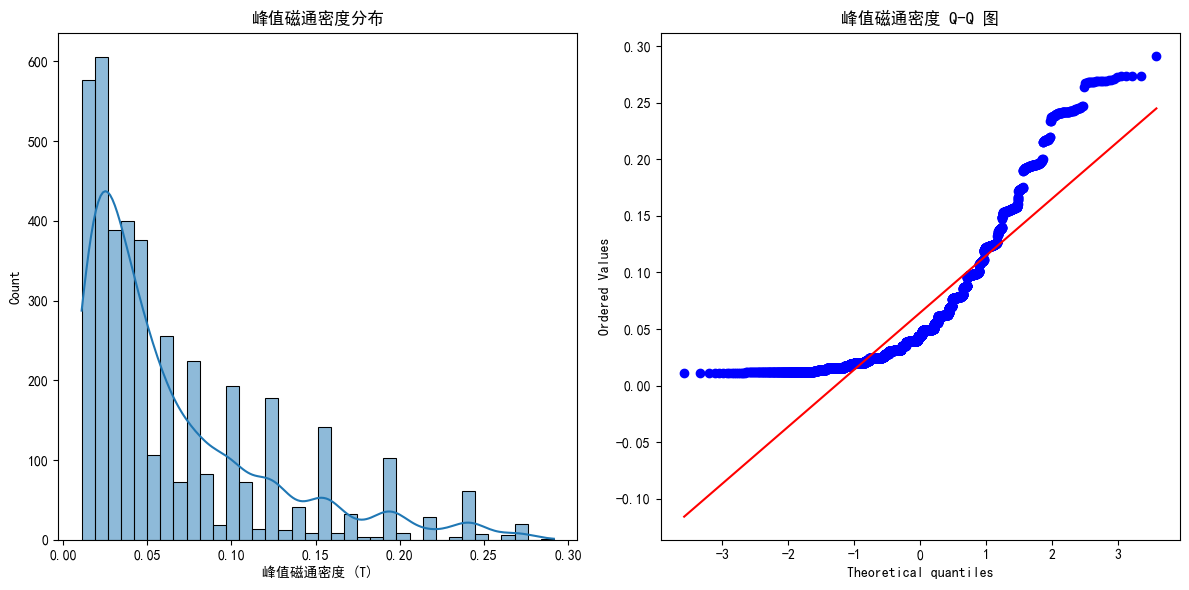

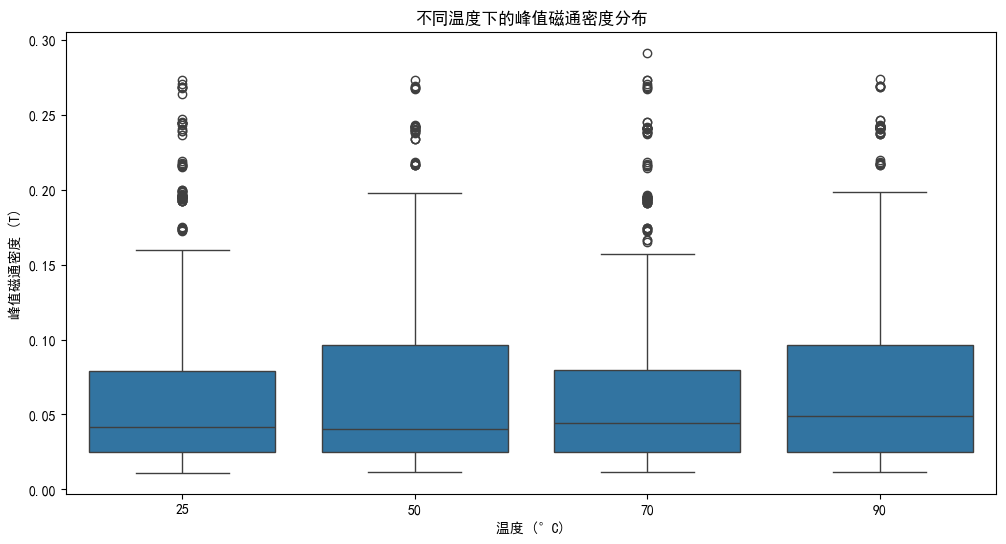

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


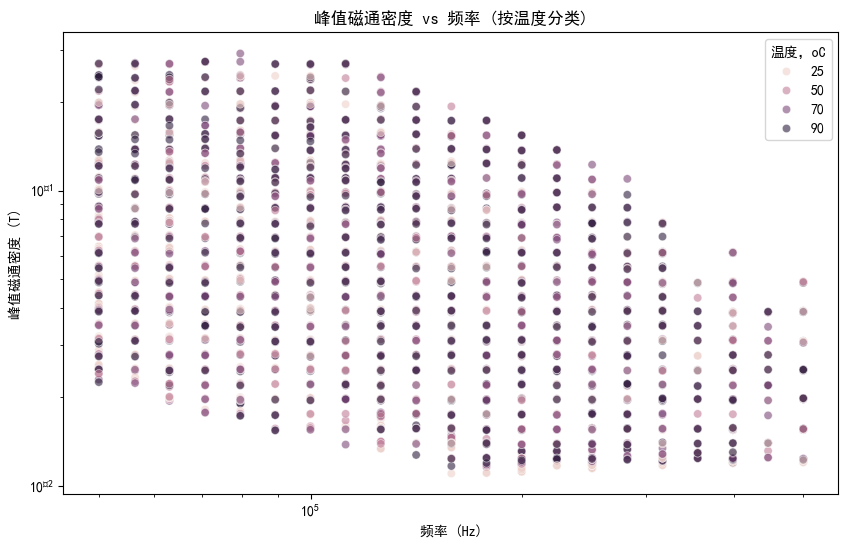

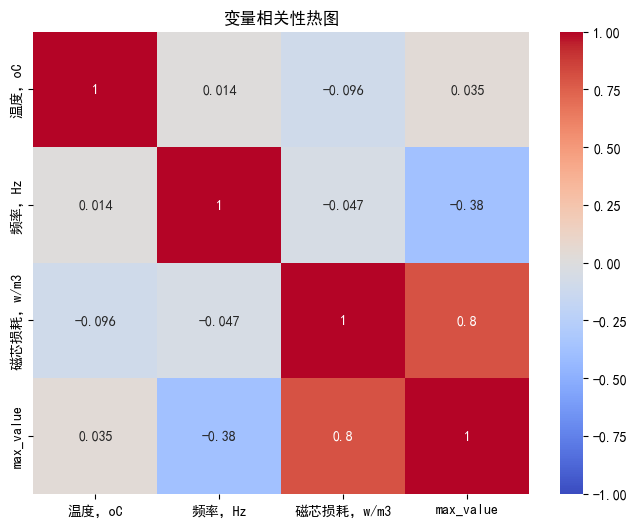

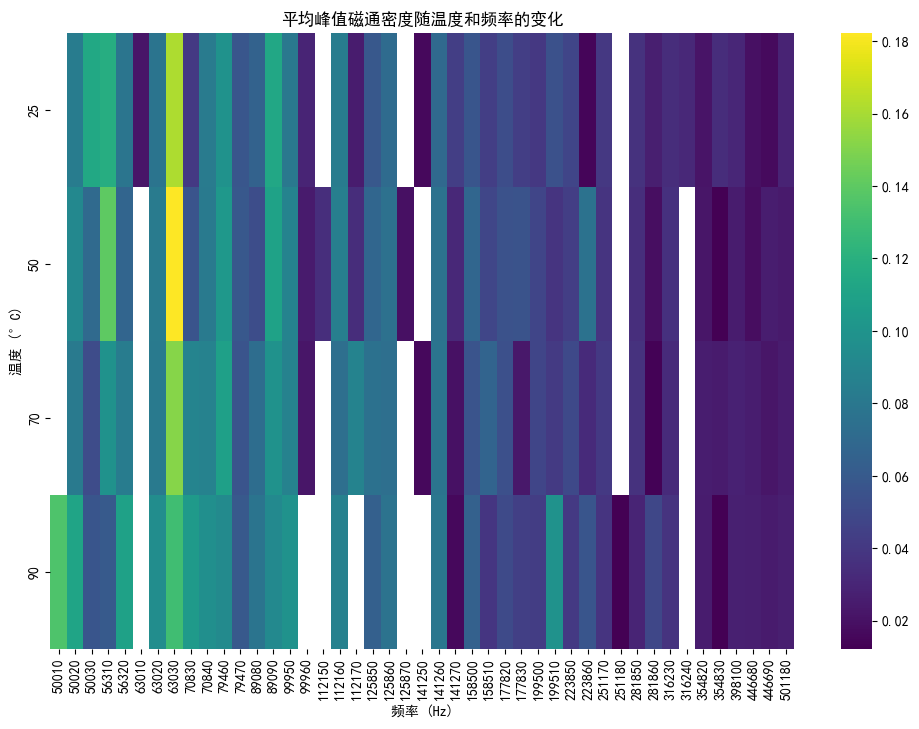

In [14]:
analyze_peak_magnetic_flux_density(data1)